In [8]:
import math, copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/Josiel1998/machine-learning/main/Datasets/RealEstate/WPB_Sold_Homes_2022.csv")
df.head()

,City,Price_per_thousand,SQFT
0,WPB,450,2049
1,WPB,413,1298
2,WPB,395,1737
3,RB,380,1746
4,WPB,305,1665


In [10]:
df.shape

(50, 3)

In [11]:
x_train = df.Price_per_thousand # features
y_train = df.SQFT # target value

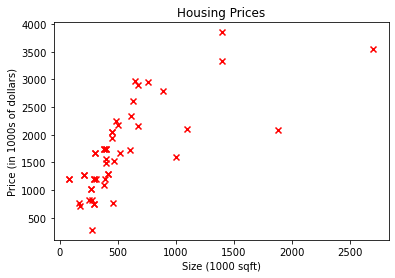

In [12]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

## Model function
$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

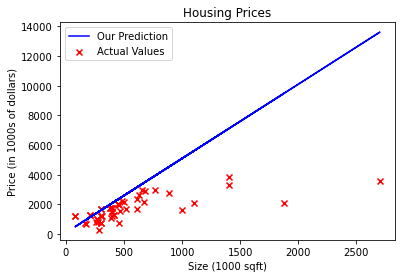

In [17]:
# model parameters
w = 5
b = 100

def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()